In [17]:
import re
def count_consecutive_ones_string(sequence, k):
  # Convert the sequence (e.g., list of ints) to a string of '0's and '1's
  sequence_str = "".join(map(str, sequence))

  # Create the substring of k consecutive '1's
  consecutive_ones_str = '1' * k

  matches = re.findall(f'(?={re.escape(consecutive_ones_str)})', sequence_str)
  return len(matches)

def PMM(sequence, k):
  # Convert the sequence (e.g., list of ints) to a string of '0's and '1's
  sequence_str = "".join(map(str, sequence))

  # Create the substring of k consecutive '1's and '1'
  ones_one = '1' * (k+1)

  # Create the substring of k consecutive '1's and '0'
  ones_zero = '1' * k + '0'

  matches1 = re.findall(f'(?={re.escape(ones_one)})', sequence_str)

  matches0 = re.findall(f'(?={re.escape(ones_zero)})', sequence_str)

  if len(matches1) + len(matches0) > 0:
    return len(matches1)/(len(matches1) + len(matches0))
  else:
    return -1

def PMX(sequence, k):
  # Convert the sequence (e.g., list of ints) to a string of '0's and '1's
  sequence_str = "".join(map(str, sequence))

  # Create the substring of k consecutive '1's and '1'
  zeros_zero = '0' * (k+1)

  # Create the substring of k consecutive '1's and '0'
  zeros_one = '0' * k + '1'

  matches1 = re.findall(f'(?={re.escape(zeros_one)})', sequence_str)

  matches0 = re.findall(f'(?={re.escape(zeros_zero)})', sequence_str)

  if len(matches1) + len(matches0) > 0:
    return len(matches1)/(len(matches1) + len(matches0))
  else:
    return -1

def PMM_PMX(n, k1, prob, num_sim):
  PMM_total = []
  PMX_total = []

  for _ in range(num_sim):
    sequence = np.random.choice([0, 1], size=n, p=[1-prob, prob])

    PMM_1 = PMM(sequence, k1)
    if PMM_1 != -1:
      PMM_total.append(PMM_1)

    PMX_1 = PMX(sequence, k1)
    if PMX_1 != -1:
      PMX_total.append(PMX_1)

  return np.mean(PMM_total) - np.mean(PMX_total)


16542


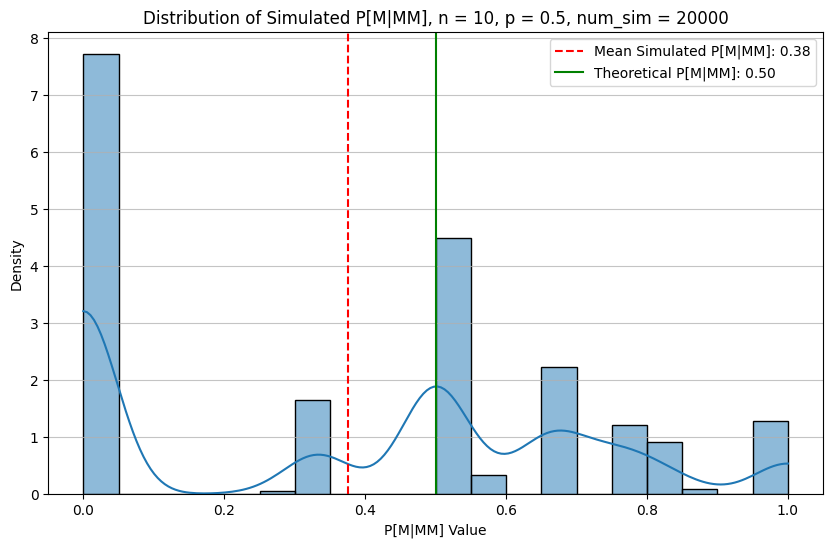

In [21]:
import numpy as np

#Simulation with fixed p

n = 10
prob = 0.5
k1 = 2
num_sim = 20000

PMM_total = []

for _ in range(num_sim):
  sequence = np.random.choice([0, 1], size=n, p=[1-prob, prob])
  PMM_1 = PMM(sequence, k1)
  if PMM_1 != -1:
    PMM_total.append(PMM_1)

print(len(PMM_total))

mean = np.mean(PMM_total)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axes object
plt.figure(figsize=(10, 6))

# Plot the distribution using a histogram
sns.histplot(PMM_total, kde=True, stat='density') # Using density to show probabilities

# Add a vertical line for the mean
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean Simulated P[M|MM]: {mean:.2f}')

# Add a vertical line for the probability 'prob'
plt.axvline(x=prob, color='g', linestyle='-', label=f'Theoretical P[M|MM]: {prob:.2f}')

# Add labels and title
plt.title('Distribution of Simulated P[M|MM], n = 10, p = 0.5, num_sim = 20000')
plt.xlabel('P[M|MM] Value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

18777


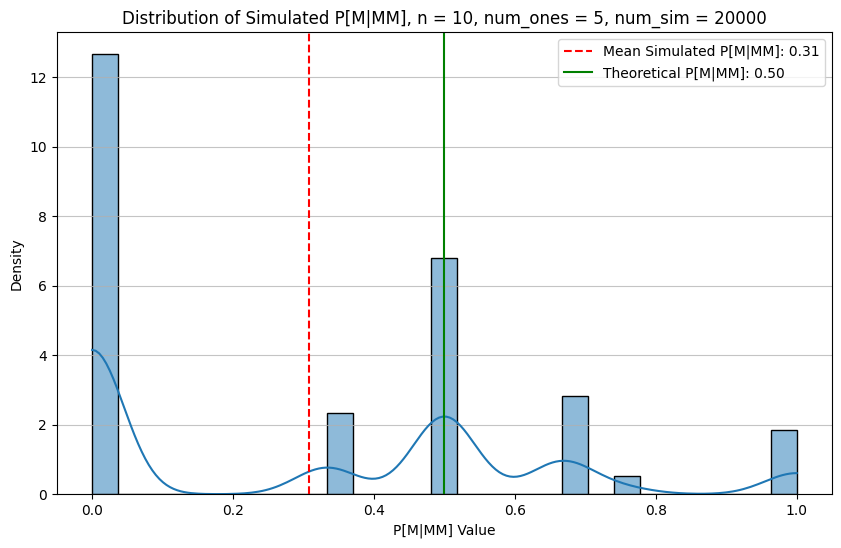

In [20]:
import numpy as np

#Simulation with fixed number of 1s - Permutation test

n = 10
n_ones = 5

sequence_f = np.array([1]*n_ones + [0]*(n - n_ones))

num_sim = 20000

PMM_total = []

for _ in range(num_sim):
  sequence = np.random.permutation(sequence_f)
  PMM_1 = PMM(sequence, k1)
  if PMM_1 != -1:
    PMM_total.append(PMM_1)

print(len(PMM_total))

mean = np.mean(PMM_total)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axes object
plt.figure(figsize=(10, 6))

# Plot the distribution using a histogram
sns.histplot(PMM_total, kde=True, stat='density') # Using density to show probabilities

# Add a vertical line for the mean
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean Simulated P[M|MM]: {mean:.2f}')

# Add a vertical line for the probability 'prob'
plt.axvline(x=prob, color='g', linestyle='-', label=f'Theoretical P[M|MM]: {prob:.2f}')

# Add labels and title
plt.title('Distribution of Simulated P[M|MM], n = 10, num_ones = 5, num_sim = 20000')
plt.xlabel('P[M|MM] Value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()